## Our Objective( strategy) is to Pre-train Bert from scratch with our own dataset! 

We pick up where they left off in the idea of Pretraining ! 
## Why Train a BERT Model from Scratch?
We will Build our own QuantitativeBERT to enable us to pretrain custom BERT models(Roberta, DeBerta,..) from scratch on our own data. 
Once the timing is right, the case for training our own BERT model is simple: 
•	Your domain-specific model can be more powerful: A sizable amount of research has shown that a BERT-style model pretrained from start to finish on a specific domain is more accurate than a BERT model that has been pretrained on generic data and then finetuned on a specific domain. Domain-specific pretrained models have advanced the state of the art in many fields, including biomedicine, materials science, and financial communications …
•	Our proprietary data and models are our competitive advantage over any one in the competition! 

•	We can use your own custom vocabulary and tokenizer for your specific domain. Like in 2023 paper: they use their custom tokenizer ( scientific Notation tokenizer) we can also choose /make our own .
 A tokenizer splits text into individual “chunks” to be processed by the NLP model. The size and quality of the tokenized vocabulary directly affect both training efficiency and model accuracy. For example, the drug “acetyltransferase” is tokenized by the standard BERT tokenizer into the seven tokens ace, ##ty, ##lt, ##ran, ##sf, ##eras, ##e instead of one or two tokens reflecting the structure and meaning of the term in a biological context [Gu et al. 2020]. Not only is this tokenization inefficient, but it leads to a suboptimal embedding for biology-related texts that cannot generalize to other related words that incorporate “acetyl” (such as acetylcholine) or “transferase” (such as methyltransferase). Another application of custom tokenization is mathematics, where poor tokenization of numbers (e.g., tokenizing “2023” into the tokens 20 and 23) may limit arithmetic reasoning in language models [Wallace et al. 2019]. By pretraining our own BERT, we can customize the tokenizer to suit our domain and task.( numeric reasoning) 

For pretraining , we need a dataset big enough! Which Qunatitative 101 dataset already provides ..but I can seem to load the whole dataset ! 
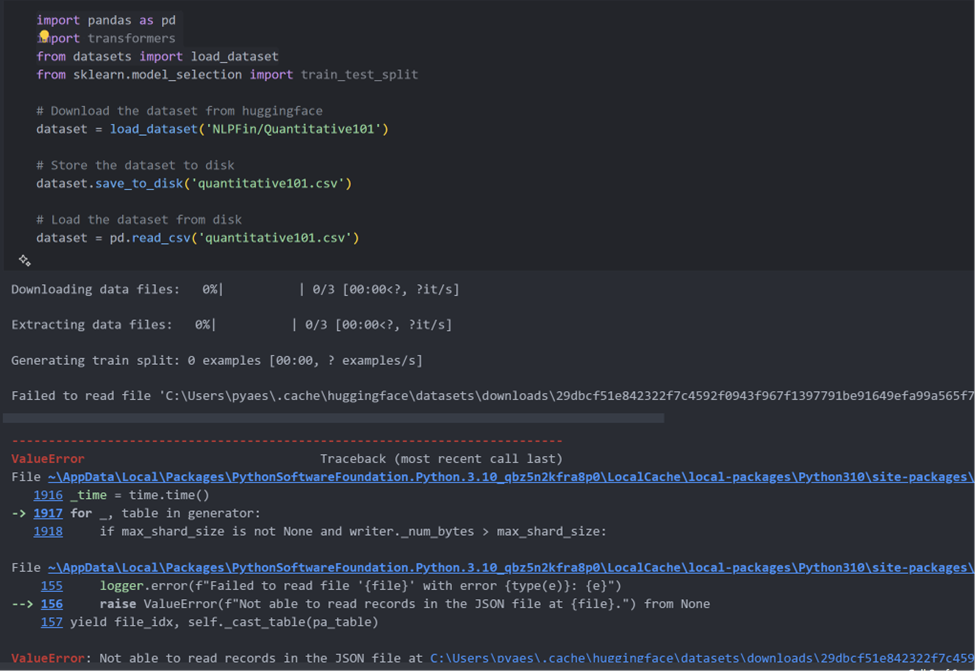

so we have to be creative about it and customize the dataset to our needs!

In [1]:
import pandas as pd
import numpy as np
import json

In [2]:
with open('QQA_QQA_train.json', 'r') as file:
    training_data = json.load(file)
    training_df = pd.DataFrame(training_data)



We will combine train and development ( validation) data to have our QQA .our first solid part of data set.

<u>( remeber we will leave test set for fine-tuning puposes later) </u>

In [3]:
with open('QQA_QQA_dev.json', 'r') as file:
    training_data = json.load(file)
    dev_df = pd.DataFrame(training_data)


In [4]:
QQA_dataset = pd.concat([training_df, dev_df], ignore_index=True)

In [5]:
QQA_dataset

,question,Option1,Option2,answer,type,question_sci_10E,question_char,question_sci_10E_char,question_mask
0,The ranger and the rustler both were riding ho...,the ranger,the rustler,Option 2,Type_3,The ranger and the rustler both were riding ho...,The ranger and the rustler both were riding ho...,The ranger and the rustler both were riding ho...,The ranger and the rustler both were riding ho...
1,Tina is racing her two dogs. Her greyhound wei...,rottweiler,greyhound,Option 1,Type_3,Tina is racing her two dogs. Her greyhound wei...,Tina is racing her two dogs. Her greyhound wei...,Tina is racing her two dogs. Her greyhound wei...,Tina is racing her two dogs. Her greyhound wei...
2,Mike and Sue decide to ride their bikes around...,Mike,Sue,Option 2,Type_3,Mike and Sue decide to ride their bikes around...,Mike and Sue decide to ride their bikes around...,Mike and Sue decide to ride their bikes around...,Mike and Sue decide to ride their bikes around...
3,A tank weighs around 63 tons. A toy car weighs...,the tank will speed up faster than the toy car,the toy car will speed up faster than the tank,Option 2,Type_3,A tank weighs around 6.3000000000E+01 tons. A ...,A tank weighs around 6 3 tons. A toy car weigh...,A tank weighs around 6 . 3 0 0 0 0 0 0 0 0 0 E...,A tank weighs around [Num] tons. A toy car wei...
4,The mammoth moved at a speed of 21 km per hour...,less resistance,more resistance,Option 2,Type_3,The mammoth moved at a speed of 2.1000000000E+...,The mammoth moved at a speed of 2 1 km per hou...,The mammoth moved at a speed of 2 . 1 0 0 0 0 ...,The mammoth moved at a speed of [Num] km per h...
...,...,...,...,...,...,...,...,...,...
640,6 kids are able to push a toy car across a woo...,wooden table,grass.,Option 2,Type_3,6.0000000000E+00 kids are able to push a toy c...,6 kids are able to push a toy car across a woo...,6 . 0 0 0 0 0 0 0 0 0 0 E + 0 0 kids are able ...,[Num] kids are able to push a toy car across a...
641,Mark is walking towards a forest and spots a l...,80 yards away,42 yards away,Option 2,Type_3,Mark is walking towards a forest and spots a l...,Mark is walking towards a forest and spots a l...,Mark is walking towards a forest and spots a l...,Mark is walking towards a forest and spots a l...
642,Mark is walking towards a forest and spots a l...,100 yards away,2 yards away,Option 2,Type_3,Mark is walking towards a forest and spots a l...,Mark is walking towards a forest and spots a l...,Mark is walking towards a forest and spots a l...,Mark is walking towards a forest and spots a l...
643,A salmon swimming through a river experiences ...,river,creek,Option 1,Type_3,A salmon swimming through a river experiences ...,A salmon swimming through a river experiences ...,A salmon swimming through a river experiences ...,A salmon swimming through a river experiences ...


In [6]:
# let's replace type 3 as QQA - Quantitative Question Answering
QQA_dataset['type'] = QQA_dataset['type'].replace('Type_3', 'QQA')

In [7]:
QQA_dataset

,question,Option1,Option2,answer,type,question_sci_10E,question_char,question_sci_10E_char,question_mask
0,The ranger and the rustler both were riding ho...,the ranger,the rustler,Option 2,QQA,The ranger and the rustler both were riding ho...,The ranger and the rustler both were riding ho...,The ranger and the rustler both were riding ho...,The ranger and the rustler both were riding ho...
1,Tina is racing her two dogs. Her greyhound wei...,rottweiler,greyhound,Option 1,QQA,Tina is racing her two dogs. Her greyhound wei...,Tina is racing her two dogs. Her greyhound wei...,Tina is racing her two dogs. Her greyhound wei...,Tina is racing her two dogs. Her greyhound wei...
2,Mike and Sue decide to ride their bikes around...,Mike,Sue,Option 2,QQA,Mike and Sue decide to ride their bikes around...,Mike and Sue decide to ride their bikes around...,Mike and Sue decide to ride their bikes around...,Mike and Sue decide to ride their bikes around...
3,A tank weighs around 63 tons. A toy car weighs...,the tank will speed up faster than the toy car,the toy car will speed up faster than the tank,Option 2,QQA,A tank weighs around 6.3000000000E+01 tons. A ...,A tank weighs around 6 3 tons. A toy car weigh...,A tank weighs around 6 . 3 0 0 0 0 0 0 0 0 0 E...,A tank weighs around [Num] tons. A toy car wei...
4,The mammoth moved at a speed of 21 km per hour...,less resistance,more resistance,Option 2,QQA,The mammoth moved at a speed of 2.1000000000E+...,The mammoth moved at a speed of 2 1 km per hou...,The mammoth moved at a speed of 2 . 1 0 0 0 0 ...,The mammoth moved at a speed of [Num] km per h...
...,...,...,...,...,...,...,...,...,...
640,6 kids are able to push a toy car across a woo...,wooden table,grass.,Option 2,QQA,6.0000000000E+00 kids are able to push a toy c...,6 kids are able to push a toy car across a woo...,6 . 0 0 0 0 0 0 0 0 0 0 E + 0 0 kids are able ...,[Num] kids are able to push a toy car across a...
641,Mark is walking towards a forest and spots a l...,80 yards away,42 yards away,Option 2,QQA,Mark is walking towards a forest and spots a l...,Mark is walking towards a forest and spots a l...,Mark is walking towards a forest and spots a l...,Mark is walking towards a forest and spots a l...
642,Mark is walking towards a forest and spots a l...,100 yards away,2 yards away,Option 2,QQA,Mark is walking towards a forest and spots a l...,Mark is walking towards a forest and spots a l...,Mark is walking towards a forest and spots a l...,Mark is walking towards a forest and spots a l...
643,A salmon swimming through a river experiences ...,river,creek,Option 1,QQA,A salmon swimming through a river experiences ...,A salmon swimming through a river experiences ...,A salmon swimming through a river experiences ...,A salmon swimming through a river experiences ...


Okay this looks good moving on! 

In [8]:
with open('Numeracy600K_headline_train.json', 'r') as file:
    training_data = json.load(file)
    training_df = pd.DataFrame(training_data)

In [11]:
with open('Numeracy600K_headline_dev.json', 'r') as file:
    training_data = json.load(file)
    dev_df = pd.DataFrame(training_data)

In [12]:
QP_headline = pd.concat([training_df, dev_df])

In [13]:
QP_headline

,id,title,publish_date,number,offset,length,magnitude,masked,title_sci_10E,title_char,title_sci_10E_char
0,0,100 Most Anticipated books releasing in 2010,20100101,2010,40,4,4,100 Most Anticipated books releasing in [Num],1.0000000000E+02 Most Anticipated books releas...,1 0 0 Most Anticipated books releasing in [Num],1 . 0 0 0 0 0 0 0 0 0 0 E + 0 2 Most Anticipat...
1,1,10 best films of 2009 - What's on your list?,20100101,2009,17,4,4,10 best films of [Num] - What's on your list?,1.0000000000E+01 best films of [Num] - What's ...,1 0 best films of [Num] - What's on your list?,1 . 0 0 0 0 0 0 0 0 0 0 E + 0 1 best films of ...
2,2,10 days of free admission at Lan Su Chinese Ga...,20100101,10,0,2,2,[Num] days of free admission at Lan Su Chinese...,[Num] days of free admission at Lan Su Chinese...,[Num] days of free admission at Lan Su Chinese...,[Num] days of free admission at Lan Su Chinese...
3,3,10 PlayStation games to watch out for in 2010,20100101,2010,41,4,4,10 PlayStation games to watch out for in [Num],1.0000000000E+01 PlayStation games to watch ou...,1 0 PlayStation games to watch out for in [Num],1 . 0 0 0 0 0 0 0 0 0 0 E + 0 1 PlayStation ga...
4,4,10 resolutions for a Happy New Year for you an...,20100101,10,0,2,2,[Num] resolutions for a Happy New Year for you...,[Num] resolutions for a Happy New Year for you...,[Num] resolutions for a Happy New Year for you...,[Num] resolutions for a Happy New Year for you...
...,...,...,...,...,...,...,...,...,...,...,...
59995,539995,Haralson County Ga. arrest report dated April ...,20130417,2013,50,4,4,Haralson County Ga. arrest report dated April ...,Haralson County Ga. arrest report dated April ...,Haralson County Ga. arrest report dated April ...,Haralson County Ga. arrest report dated April ...
59996,539996,Healthy eating 101: Mixed nuts,20130417,101,15,3,3,Healthy eating [Num]: Mixed nuts,Healthy eating [Num]: Mixed nuts,Healthy eating [Num]: Mixed nuts,Healthy eating [Num]: Mixed nuts
59997,539997,Holland America's Amsterdam to embark on 113-d...,20130417,113,41,3,3,Holland America's Amsterdam to embark on [Num]...,Holland America's Amsterdam to embark on [Num]...,Holland America's Amsterdam to embark on [Num]...,Holland America's Amsterdam to embark on [Num]...
59998,539998,HP Envy 4 TouchSmart is your perfect first Win...,20130417,8,51,1,1,HP Envy 4 TouchSmart is your perfect first Win...,HP Envy 4.0000000000E+00 TouchSmart is your pe...,HP Envy 4 TouchSmart is your perfect first Win...,HP Envy 4 . 0 0 0 0 0 0 0 0 0 0 E + 0 0 TouchS...


In [14]:
with open('Numeracy600K_headline_train.json', 'r') as file:
    training_data = json.load(file)
    training_df = pd.DataFrame(training_data)

In [16]:
with open('Numeracy600K_comment_dev.json', 'r') as file:
    training_data = json.load(file)
    dev_df = pd.DataFrame(training_data)

In [17]:
QP_comment = pd.concat([training_df, dev_df])

In [18]:
QP_comment

,id,title,publish_date,number,offset,length,magnitude,masked,title_sci_10E,title_char,title_sci_10E_char,UNIQUE_STORY_INDEX,comment,comment_sci_10E,comment_char,comment_sci_10E_char
0,0,100 Most Anticipated books releasing in 2010,20100101,2010,40,4,4,100 Most Anticipated books releasing in [Num],1.0000000000E+02 Most Anticipated books releas...,1 0 0 Most Anticipated books releasing in [Num],1 . 0 0 0 0 0 0 0 0 0 0 E + 0 2 Most Anticipat...,NaN,NaN,NaN,NaN,NaN
1,1,10 best films of 2009 - What's on your list?,20100101,2009,17,4,4,10 best films of [Num] - What's on your list?,1.0000000000E+01 best films of [Num] - What's ...,1 0 best films of [Num] - What's on your list?,1 . 0 0 0 0 0 0 0 0 0 0 E + 0 1 best films of ...,NaN,NaN,NaN,NaN,NaN
2,2,10 days of free admission at Lan Su Chinese Ga...,20100101,10,0,2,2,[Num] days of free admission at Lan Su Chinese...,[Num] days of free admission at Lan Su Chinese...,[Num] days of free admission at Lan Su Chinese...,[Num] days of free admission at Lan Su Chinese...,NaN,NaN,NaN,NaN,NaN
3,3,10 PlayStation games to watch out for in 2010,20100101,2010,41,4,4,10 PlayStation games to watch out for in [Num],1.0000000000E+01 PlayStation games to watch ou...,1 0 PlayStation games to watch out for in [Num],1 . 0 0 0 0 0 0 0 0 0 0 E + 0 1 PlayStation ga...,NaN,NaN,NaN,NaN,NaN
4,4,10 resolutions for a Happy New Year for you an...,20100101,10,0,2,2,[Num] resolutions for a Happy New Year for you...,[Num] resolutions for a Happy New Year for you...,[Num] resolutions for a Happy New Year for you...,[Num] resolutions for a Happy New Year for you...,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,539995,NaN,NaN,19.8,113,4,2,FIRST SENSOR AG <SISG.DE> SAYS 9MTH EBIT ADJUS...,NaN,NaN,NaN,20141110115045nASN0005FW,FIRST SENSOR AG <SISG.DE> SAYS 9MTH EBIT ADJUS...,FIRST SENSOR AG <SISG.DE> SAYS 9.0000000000E+0...,FIRST SENSOR AG <SISG.DE> SAYS 9MTH EBIT ADJUS...,FIRST SENSOR AG <SISG.DE> SAYS 9 . 0 0 0 0 0 0...
59996,539996,NaN,NaN,35.9,85,4,2,EHI CAR SERVICES LTD <EHIC.N> QTRLY NET REVENU...,NaN,NaN,NaN,20141211120440nASD083FT,EHI CAR SERVICES LTD <EHIC.N> QTRLY NET REVENU...,EHI CAR SERVICES LTD <EHIC.N> QTRLY NET REVENU...,EHI CAR SERVICES LTD <EHIC.N> QTRLY NET REVENU...,EHI CAR SERVICES LTD <EHIC.N> QTRLY NET REVENU...
59997,539997,NaN,NaN,0.66,35,4,0,CNA FINANCIAL CORP <CNA.N> Q3 SHR $[Num],NaN,NaN,NaN,20151102110010nASB0ADRW,CNA FINANCIAL CORP <CNA.N> Q3 SHR $0.66,CNA FINANCIAL CORP <CNA.N> Q3.0000000000E+00 S...,CNA FINANCIAL CORP <CNA.N> Q3 SHR $[Num],CNA FINANCIAL CORP <CNA.N> Q3 . 0 0 0 0 0 0 0 ...
59998,539998,NaN,NaN,100.46,142,6,3,BROOKFIELD ASSET MANAGEMENT - NOTES WILL HAVE ...,NaN,NaN,NaN,20131017162022nASA0878W,BROOKFIELD ASSET MANAGEMENT - NOTES WILL HAVE ...,BROOKFIELD ASSET MANAGEMENT - NOTES WILL HAVE ...,BROOKFIELD ASSET MANAGEMENT - NOTES WILL HAVE ...,BROOKFIELD ASSET MANAGEMENT - NOTES WILL HAVE ...


In [24]:
with open('QNLI_QNLI-Stress Test_QNLI-Stress Test_train.json', 'r') as file:
    training_data = json.load(file)
    training_df = pd.DataFrame(training_data)

In [26]:
with open('QNLI_QNLI-Stress Test_QNLI-Stress Test_dev.json', 'r') as file:
    validation_data = json.load(file)
    validation_df = pd.DataFrame(validation_data)

In [27]:
QNLI_dataset = pd.concat([training_df, validation_df])

In [28]:
QNLI_dataset

,statement1,statement2,options,answer,type,statement1_sci_10E,statement1_char,statement1_sci_10E_char,statement2_sci_10E,statement2_char,statement2_sci_10E_char,statement1_mask,statement2_mask,EQUATE
0,'' Someone just came in and shot my daughter a...,"Raul Flores , daughter , 9 , shot dead ; wire ...",Entailment or neutral?,neutral,Type_7,'' Someone just came in and shot my daughter a...,'' Someone just came in and shot my daughter a...,'' Someone just came in and shot my daughter a...,"Raul Flores , daughter , 9.0000000000E+00 , sh...","Raul Flores , daughter , 9 , shot dead ; wire ...","Raul Flores , daughter , 9 . 0 0 0 0 0 0 0 0 0...",'' Someone just came in and shot my daughter a...,"Raul Flores , daughter , [Num] , shot dead ; w...",NewsNLI
1,"A $ 5,000 reward is offered .",Know something ? Call 641-228-182 . A reward i...,Entailment or neutral?,neutral,Type_7,A $ 5.0000000000E+03 reward is offered .,"A $ 5 , 0 0 0 reward is offered .",A $ 5 . 0 0 0 0 0 0 0 0 0 0 E + 0 3 reward is ...,Know something ? Call 6.4100000000E+02-2.28000...,Know something ? Call 6 4 1- 2 2 8- 1 8 2 . A ...,Know something ? Call 6 . 4 1 0 0 0 0 0 0 0 0 ...,A $ [Num] reward is offered .,Know something ? Call [Num][Num][Num] . A rewa...,NewsNLI
2,"At Veridux Corporation , there are 250 employees","At Veridux Corporation , there are less than 6...",Entailment or contradiction or neutral?,Entailment,Type_7,"At Veridux Corporation , there are 2.500000000...","At Veridux Corporation , there are 2 5 0 emplo...","At Veridux Corporation , there are 2 . 5 0 0 0...","At Veridux Corporation , there are less than 6...","At Veridux Corporation , there are less than 6...","At Veridux Corporation , there are less than 6...","At Veridux Corporation , there are [Num] emplo...","At Veridux Corporation , there are less than [...",StressTest
3,The ratio between the number of sheep and the ...,The ratio between the number of sheep and the ...,Entailment or contradiction or neutral?,contradiction,Type_7,The ratio between the number of sheep and the ...,The ratio between the number of sheep and the ...,The ratio between the number of sheep and the ...,The ratio between the number of sheep and the ...,The ratio between the number of sheep and the ...,The ratio between the number of sheep and the ...,The ratio between the number of sheep and the ...,The ratio between the number of sheep and the ...,StressTest
4,More than 1.2 million people have since viewed...,Over 1.2 million people have viewed it on YouTube,Entailment or neutral?,Entailment,Type_7,More than 1.2000000000E+00 million people have...,More than 1 . 2 million people have since view...,More than 1 . 2 0 0 0 0 0 0 0 0 0 E + 0 0 mill...,Over 1.2000000000E+00 million people have view...,Over 1 . 2 million people have viewed it on Yo...,Over 1 . 2 0 0 0 0 0 0 0 0 0 E + 0 0 million p...,More than [Num] million people have since view...,Over [Num] million people have viewed it on Yo...,NewsNLI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
965,How many different ways can you arrange the mo...,How many different ways can you arrange the 4 ...,Entailment or contradiction or neutral?,neutral,Type_7,How many different ways can you arrange the mo...,How many different ways can you arrange the mo...,How many different ways can you arrange the mo...,How many different ways can you arrange the 4....,How many different ways can you arrange the 4 ...,How many different ways can you arrange the 4 ...,How many different ways can you arrange the mo...,How many different ways can you arrange the [N...,StressTest
966,"Mike can catch 15 fish in one hour , Jim can c...","Mike can catch less than 15 fish in one hour ,...",Entailment or contradiction or neutral?,contradiction,Type_7,Mike can catch 1.5.0000000000E+0100000000E+01 ...,"Mike can catch 1 5 fish in one hour , Jim can ...",Mike can catch 1 . 5 0 0 0 0 0 0 0 0 0 E + 0 1...,Mike can catch less than 1.5.0000000000E+01000...,Mike can catch less than 1 5 fish in on

In [29]:
# let's drop the last column EQUATE
QNLI_dataset = QNLI_dataset.drop(columns=['EQUATE'])

In [30]:
QNLI_dataset

,statement1,statement2,options,answer,type,statement1_sci_10E,statement1_char,statement1_sci_10E_char,statement2_sci_10E,statement2_char,statement2_sci_10E_char,statement1_mask,statement2_mask
0,'' Someone just came in and shot my daughter a...,"Raul Flores , daughter , 9 , shot dead ; wire ...",Entailment or neutral?,neutral,Type_7,'' Someone just came in and shot my daughter a...,'' Someone just came in and shot my daughter a...,'' Someone just came in and shot my daughter a...,"Raul Flores , daughter , 9.0000000000E+00 , sh...","Raul Flores , daughter , 9 , shot dead ; wire ...","Raul Flores , daughter , 9 . 0 0 0 0 0 0 0 0 0...",'' Someone just came in and shot my daughter a...,"Raul Flores , daughter , [Num] , shot dead ; w..."
1,"A $ 5,000 reward is offered .",Know something ? Call 641-228-182 . A reward i...,Entailment or neutral?,neutral,Type_7,A $ 5.0000000000E+03 reward is offered .,"A $ 5 , 0 0 0 reward is offered .",A $ 5 . 0 0 0 0 0 0 0 0 0 0 E + 0 3 reward is ...,Know something ? Call 6.4100000000E+02-2.28000...,Know something ? Call 6 4 1- 2 2 8- 1 8 2 . A ...,Know something ? Call 6 . 4 1 0 0 0 0 0 0 0 0 ...,A $ [Num] reward is offered .,Know something ? Call [Num][Num][Num] . A rewa...
2,"At Veridux Corporation , there are 250 employees","At Veridux Corporation , there are less than 6...",Entailment or contradiction or neutral?,Entailment,Type_7,"At Veridux Corporation , there are 2.500000000...","At Veridux Corporation , there are 2 5 0 emplo...","At Veridux Corporation , there are 2 . 5 0 0 0...","At Veridux Corporation , there are less than 6...","At Veridux Corporation , there are less than 6...","At Veridux Corporation , there are less than 6...","At Veridux Corporation , there are [Num] emplo...","At Veridux Corporation , there are less than [..."
3,The ratio between the number of sheep and the ...,The ratio between the number of sheep and the ...,Entailment or contradiction or neutral?,contradiction,Type_7,The ratio between the number of sheep and the ...,The ratio between the number of sheep and the ...,The ratio between the number of sheep and the ...,The ratio between the number of sheep and the ...,The ratio between the number of sheep and the ...,The ratio between the number of sheep and the ...,The ratio between the number of sheep and the ...,The ratio between the number of sheep and the ...
4,More than 1.2 million people have since viewed...,Over 1.2 million people have viewed it on YouTube,Entailment or neutral?,Entailment,Type_7,More than 1.2000000000E+00 million people have...,More than 1 . 2 million people have since view...,More than 1 . 2 0 0 0 0 0 0 0 0 0 E + 0 0 mill...,Over 1.2000000000E+00 million people have view...,Over 1 . 2 million people have viewed it on Yo...,Over 1 . 2 0 0 0 0 0 0 0 0 0 E + 0 0 million p...,More than [Num] million people have since view...,Over [Num] million people have viewed it on Yo...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
965,How many different ways can you arrange the mo...,How many different ways can you arrange the 4 ...,Entailment or contradiction or neutral?,neutral,Type_7,How many different ways can you arrange the mo...,How many different ways can you arrange the mo...,How many different ways can you arrange the mo...,How many different ways can you arrange the 4....,How many different ways can you arrange the 4 ...,How many different ways can you arrange the 4 ...,How many different ways can you arrange the mo...,How many different ways can you arrange the [N...
966,"Mike can catch 15 fish in one hour , Jim can c...","Mike can catch less than 15 fish in one hour ,...",Entailment or contradiction or neutral?,contradiction,Type_7,Mike can catch 1.5.0000000000E+0100000000E+01 ...,"Mike can catch 1 5 fish in one hour , Jim can ...",Mike can catch 1 . 5 0 0 0 0 0 0 0 0 0 E + 0 1...,Mike can catch less than 1.5.0000000000E+01000...,Mike can catch less than 1 5 fish in one hour ...,Mike can catch less than 1 . 5 0 0 0 0 0 0 0 0...,"Mike c

In [31]:
# Let's replace the type 7 as QNLI - Quantitative Natural Language Inference
QNLI_dataset['type'] = QNLI_dataset['type'].replace('Type_7', 'QNLI')

In [32]:
QNLI_dataset

,statement1,statement2,options,answer,type,statement1_sci_10E,statement1_char,statement1_sci_10E_char,statement2_sci_10E,statement2_char,statement2_sci_10E_char,statement1_mask,statement2_mask
0,'' Someone just came in and shot my daughter a...,"Raul Flores , daughter , 9 , shot dead ; wire ...",Entailment or neutral?,neutral,QNLI,'' Someone just came in and shot my daughter a...,'' Someone just came in and shot my daughter a...,'' Someone just came in and shot my daughter a...,"Raul Flores , daughter , 9.0000000000E+00 , sh...","Raul Flores , daughter , 9 , shot dead ; wire ...","Raul Flores , daughter , 9 . 0 0 0 0 0 0 0 0 0...",'' Someone just came in and shot my daughter a...,"Raul Flores , daughter , [Num] , shot dead ; w..."
1,"A $ 5,000 reward is offered .",Know something ? Call 641-228-182 . A reward i...,Entailment or neutral?,neutral,QNLI,A $ 5.0000000000E+03 reward is offered .,"A $ 5 , 0 0 0 reward is offered .",A $ 5 . 0 0 0 0 0 0 0 0 0 0 E + 0 3 reward is ...,Know something ? Call 6.4100000000E+02-2.28000...,Know something ? Call 6 4 1- 2 2 8- 1 8 2 . A ...,Know something ? Call 6 . 4 1 0 0 0 0 0 0 0 0 ...,A $ [Num] reward is offered .,Know something ? Call [Num][Num][Num] . A rewa...
2,"At Veridux Corporation , there are 250 employees","At Veridux Corporation , there are less than 6...",Entailment or contradiction or neutral?,Entailment,QNLI,"At Veridux Corporation , there are 2.500000000...","At Veridux Corporation , there are 2 5 0 emplo...","At Veridux Corporation , there are 2 . 5 0 0 0...","At Veridux Corporation , there are less than 6...","At Veridux Corporation , there are less than 6...","At Veridux Corporation , there are less than 6...","At Veridux Corporation , there are [Num] emplo...","At Veridux Corporation , there are less than [..."
3,The ratio between the number of sheep and the ...,The ratio between the number of sheep and the ...,Entailment or contradiction or neutral?,contradiction,QNLI,The ratio between the number of sheep and the ...,The ratio between the number of sheep and the ...,The ratio between the number of sheep and the ...,The ratio between the number of sheep and the ...,The ratio between the number of sheep and the ...,The ratio between the number of sheep and the ...,The ratio between the number of sheep and the ...,The ratio between the number of sheep and the ...
4,More than 1.2 million people have since viewed...,Over 1.2 million people have viewed it on YouTube,Entailment or neutral?,Entailment,QNLI,More than 1.2000000000E+00 million people have...,More than 1 . 2 million people have since view...,More than 1 . 2 0 0 0 0 0 0 0 0 0 E + 0 0 mill...,Over 1.2000000000E+00 million people have view...,Over 1 . 2 million people have viewed it on Yo...,Over 1 . 2 0 0 0 0 0 0 0 0 0 E + 0 0 million p...,More than [Num] million people have since view...,Over [Num] million people have viewed it on Yo...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
965,How many different ways can you arrange the mo...,How many different ways can you arrange the 4 ...,Entailment or contradiction or neutral?,neutral,QNLI,How many different ways can you arrange the mo...,How many different ways can you arrange the mo...,How many different ways can you arrange the mo...,How many different ways can you arrange the 4....,How many different ways can you arrange the 4 ...,How many different ways can you arrange the 4 ...,How many different ways can you arrange the mo...,How many different ways can you arrange the [N...
966,"Mike can catch 15 fish in one hour , Jim can c...","Mike can catch less than 15 fish in one hour ,...",Entailment or contradiction or neutral?,contradiction,QNLI,Mike can catch 1.5.0000000000E+0100000000E+01 ...,"Mike can catch 1 5 fish in one hour , Jim can ...",Mike can catch 1 . 5 0 0 0 0 0 0 0 0 0 E + 0 1...,Mike can catch less than 1.5.0000000000E+01000...,Mike can catch less than 1 5 fish in one hour ...,Mike can catch less than 1 . 5 0 0 0 0 0 0 0 0...,"Mike can catch [Num]

# QNLI_dataset, QP_comment, QP_headline, QQA_dataset.. let's combine them all together! 

While doing so, we need to follow the same format as the original dataset. json ... let's read some guidelines from internet and see how we can do it!

For creating a dataset to pretrain a BERT model from scratch, the ideal format would be:

A JSON file
Where each line is a JSON object containing a single text example
And each text example has these keys:
text: The actual text sequence
title (optional): A title/summary for the text
url (optional): An original url if sourced from web pages
other metadata fields as needed
For example:

examples.jsonl

{"text": "This is a sample text sequence", "title": "Example 1"}
{"text": "Here is another text example for pretraining BERT", "url": "http://example.com/page1"}

{"text": "This is a sample text sequence", "title": "Example 1"}
{"text": "Here is another text example for pretraining BERT", "url": "http://example.com/page1"}
The key things are:

Store each text chunk you want BERT to learn from as one JSON object per line
Ensure there is a "text" field with the actual sequence
Optionally include relevant metadata like title, urls, etc in the same object
Store all of this in a single large JSON file
You can add other fields like domain, date etc to capture additional metadata if useful for your application.

The HuggingFace TensorFlow data library has utilities to easily load such a JSON format. But the format is pretty generic and should be supported by any deep learning framework.

In [37]:
# so for our dataset we need to combine all the datasets above and turn them into a json file again , keeping their respective fields intact
# let's combine all the datasets into one

# let's combine all the datasets into one
all_datasets = pd.concat([QQA_dataset, QP_headline, QP_comment, QNLI_dataset], ignore_index=True)

In [38]:
# now let's shuffle the dataset
all_datasets = all_datasets.sample(frac=1).reset_index(drop=True)

In [39]:
# let's save the dataset as a json file
all_datasets.to_json('all_datasets.json', orient='records')

In [40]:
# let's load the dataset again
with open('all_datasets.json', 'r') as file:
    all_datasets = json.load(file)



In [41]:
# let's check the length of the dataset
len(all_datasets)

1088090

In [42]:
# let's check the first 5 rows of the dataset
all_datasets[:5]

[{'question': None,
  'Option1': None,
  'Option2': None,
  'answer': None,
  'type': None,
  'question_sci_10E': None,
  'question_char': None,
  'question_sci_10E_char': None,
  'question_mask': None,
  'id': 24190.0,
  'title': 'Lady Antebellum tops Billboard 200 (with video)',
  'publish_date': '20100213',
  'number': '200',
  'offset': 31.0,
  'length': 3.0,
  'magnitude': 3.0,
  'masked': 'Lady Antebellum tops Billboard [Num] (with video)',
  'title_sci_10E': 'Lady Antebellum tops Billboard [Num] (with video)',
  'title_char': 'Lady Antebellum tops Billboard [Num] (with video)',
  'title_sci_10E_char': 'Lady Antebellum tops Billboard [Num] (with video)',
  'UNIQUE_STORY_INDEX': None,
  'comment': None,
  'comment_sci_10E': None,
  'comment_char': None,
  'comment_sci_10E_char': None,
  'statement1': None,
  'statement2': None,
  'options': None,
  'statement1_sci_10E': None,
  'statement1_char': None,
  'statement1_sci_10E_char': None,
  'statement2_sci_10E': None,
  'statement2_

In [43]:
# let's check the last 5 rows of the dataset
all_datasets[-5:]

[{'question': None,
  'Option1': None,
  'Option2': None,
  'answer': None,
  'type': None,
  'question_sci_10E': None,
  'question_char': None,
  'question_sci_10E_char': None,
  'question_mask': None,
  'id': 398982.0,
  'title': 'Kiss and Motley Crue Announce 2012 Tour',
  'publish_date': '20120331',
  'number': '2012',
  'offset': 30.0,
  'length': 4.0,
  'magnitude': 4.0,
  'masked': 'Kiss and Motley Crue Announce [Num] Tour',
  'title_sci_10E': 'Kiss and Motley Crue Announce [Num] Tour',
  'title_char': 'Kiss and Motley Crue Announce [Num] Tour',
  'title_sci_10E_char': 'Kiss and Motley Crue Announce [Num] Tour',
  'UNIQUE_STORY_INDEX': None,
  'comment': None,
  'comment_sci_10E': None,
  'comment_char': None,
  'comment_sci_10E_char': None,
  'statement1': None,
  'statement2': None,
  'options': None,
  'statement1_sci_10E': None,
  'statement1_char': None,
  'statement1_sci_10E_char': None,
  'statement2_sci_10E': None,
  'statement2_char': None,
  'statement2_sci_10E_char': 

In [44]:
# okay now let's save the dataset as a json file
with open('all_datasets.json', 'w') as file:
    json.dump(all_datasets, file)


In [45]:
# let's load the dataset again
with open('all_datasets.json', 'r') as file:
    all_datasets = json.load(file)


In [46]:
# let's check the length of the dataset
len(all_datasets)

1088090

## okay everything loooking gooood! we have our dataset ready!